MNIST data image of shape: 28 * 28 = 784

`X = tf.placeholder(tf.float32, [None, 784])`

0-9 digits recognition = 10 classes

`Y = tf.placeholder(tf.float32, [None, nb_classes])`

### Trainint epoch/batch
- batch: 전체 데이터 셋 중 한번에 학습 시킬 데이터 셋의 양
- epoch: 전체 데이터 셋을 얼마나 많이 학습 시킬 것인지.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001, Cost: 2.824943846
Epoch: 0002, Cost: 1.126905645
Epoch: 0003, Cost: 0.905327295
Epoch: 0004, Cost: 0.792994442
Epoch: 0005, Cost: 0.720710694
Epoch: 0006, Cost: 0.668939417
Epoch: 0007, Cost: 0.629426249
Epoch: 0008, Cost: 0.598053422
Epoch: 0009, Cost: 0.572248136
Epoch: 0010, Cost: 0.550214758
Epoch: 0011, Cost: 0.531512921
Epoch: 0012, Cost: 0.514903382
Epoch: 0013, Cost: 0.500168951
Epoch: 0014, Cost: 0.487966623
Epoch: 0015, Cost: 0.475969701
Epoch: 0016, Cost: 0.465514251
Epoch: 0017, Cost: 0.456124353
Epoch: 0018, Cost: 0.447293324
Epoch: 0019, Cost: 0.439516211
Epoch: 0020, Cost: 0.432235442
Epoch: 0021, Cost: 0.425251528
Epoch: 0022, Cost: 0.418889867
Epoch: 0023, Cost: 0.412968136
Epoch: 0024, Cost: 0.407520861
Epoch: 0025, Cost: 0.401922530
Epoch: 0026, Cost: 0.397469307


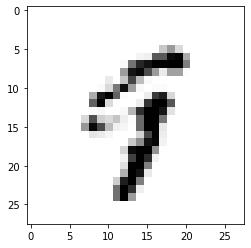

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
tf.set_random_seed(777)

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0~9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis using softmax
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
num_epochs = 50
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(num_epochs):
        avg_cost = 0
        
        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations
        
        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))
    
    print("Learning finished")
    
    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(
        session=sess,
        feed_dict={X: mnist.test.images, Y: mnist.test.labels}
    ))
    
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}))
    
    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest"
    )
    plt.show()